# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [2]:
# Initialize the random number generator
##import random
#random.seed(0)

# Ignore the warnings
#import warnings
#warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [3]:
#importing the packages
import pandas as pd
import os

In [4]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
#drive.mount('/content/drive/My Drive/')

In [5]:
#checking the path
os.getcwd()

'/content'

In [6]:
#setting the path
os.chdir('/content/drive/MyDrive/LAB ML')

In [7]:
os.getcwd()

'/content/drive/MyDrive/LAB ML'

In [8]:
#reading the data
df = pd.read_csv('download.csv')


In [9]:
#cheking the shape of data
df.shape

(851264, 7)

In [10]:
# run this cell to upload file using GUI if you are using google colab

#From google.colab import files
#files.upload()

In [11]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


## Question 2



### Drop null
- Drop null values if any

In [12]:
#cheking the null values
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [13]:
#there are no null values to drop

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [14]:
#droping the columns
df.drop(['date','volume','symbol'] , axis=1, inplace = True)

## Question 3

### Print the dataframe
- print the modified dataframe

In [15]:
#print the modified dataframe
df.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [16]:
df.shape

(851264, 4)

In [17]:
#saperating the labels and features
X = df.drop(axis=1,columns='close')
y = df.pop('close')

In [18]:
#print the modified dataframe
X.head()

,open,low,high
0,123.430000,122.309998,126.250000
1,125.239998,119.940002,125.540001
2,116.379997,114.930000,119.739998
3,115.480003,113.500000,117.440002
4,117.010002,114.089996,117.330002


In [19]:
#print the modified dataframe
y.head()

0    125.839996
1    119.980003
2    114.949997
3    116.620003
4    114.970001
Name: close, dtype: float64

## Question 4

### Create train and test sets
- Split the data into training and testing

In [20]:
#splitting the data into test and train set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.30, random_state=50)

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [21]:
#importing the packages
from sklearn.preprocessing import StandardScaler
#scaling the data by using the StandarScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [22]:
#cheking the type X_train_sc 
type(X_train_sc )
#X_train_sc  is already in numpy array

numpy.ndarray

In [23]:
#cheking the type Y_train
type(Y_train)

pandas.core.series.Series

In [24]:
#importing the package
import numpy as np

In [25]:
#Convert data to NumPy array
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [26]:
#cheking the chnages
type(Y_train)

numpy.ndarray

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [27]:
#importing the packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [28]:
#nitialize a Sequential model
model = Sequential([Flatten(),Dense(1, activation='linear')])

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [29]:
#Compiling the model
model.compile(optimizer='sgd', loss='mse')

## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [30]:
#fitting the model
model.fit(X_train_sc,Y_train,                   
          epochs=50,
          batch_size=128,
          validation_data=(X_test_sc ,Y_test))

Epoch 1/50
4656/4656 [==============================] - 6s 1ms/step - loss: 248.2123 - val_loss: 0.9758
Epoch 2/50
4656/4656 [==============================] - 6s 1ms/step - loss: 0.9746 - val_loss: 0.9870
Epoch 3/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9652 - val_loss: 0.9622
Epoch 4/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9318 - val_loss: 0.9554
Epoch 5/50
4656/4656 [==============================] - 6s 1ms/step - loss: 0.9343 - val_loss: 0.9491
Epoch 6/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9218 - val_loss: 0.9425
Epoch 7/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9138 - val_loss: 0.9372
Epoch 8/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9434 - val_loss: 0.9451
Epoch 9/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9013 - val_loss: 0.9582
Epoch 10/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.8

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [31]:
#Evaluating the model
model.evaluate(X_test_sc ,Y_test)


7981/7981 [==============================] - 6s 795us/step - loss: 0.7544


0.7543776631355286

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [32]:

model.predict(scaler.transform([[123.430000, 122.30999, 116.250000]]))

array([[119.69267]], dtype=float32)

In [33]:
#model.predict([[123.430000, 122.30999, 116.250000]])

# Build a DNN


### Collect Fashion mnist data from tf.keras.datasets 

In [111]:
#importing the ttensorflow
import tensorflow as tf


In [112]:
#loading the data set from tensrflow keras
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

 cheking the shape

In [113]:
x_train.shape

(60000, 28, 28)

In [114]:
y_train.shape

(60000,)

In [115]:
x_test.shape

(10000, 28, 28)

In [116]:
y_test.shape

(10000,)

### Change train and test labels into one-hot vectors

In [117]:
#applying one hot vectors
trainy = tf.keras.utils.to_categorical(y_train, num_classes=10)
testy = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [118]:
trainy.shape

(60000, 10)

### Build the Graph

### Initialize model, reshape & normalize data

In [119]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [120]:
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

###Also add callback, such that if validation loss doesn't decreases consecutively 2 times, stop the training

In [121]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [122]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [123]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Print model summary

In [124]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
______________________________________________

###Train your model, use test data as validation set

In [125]:
model.fit(x_train,trainy,validation_data=(x_test, testy),epochs=10,batch_size=32,callbacks=callback)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6362 - accuracy: 0.7761 - val_loss: 0.4121 - val_accuracy: 0.8487
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3974 - accuracy: 0.8564 - val_loss: 0.3895 - val_accuracy: 0.8559
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3597 - accuracy: 0.8681 - val_loss: 0.4038 - val_accuracy: 0.8573
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3378 - accuracy: 0.8753 - val_loss: 0.3723 - val_accuracy: 0.8707
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3106 - accuracy: 0.8848 - val_loss: 0.3415 - val_accuracy: 0.8807
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2917 - accuracy: 0.8915 - val_loss: 0.3614 - val_accuracy: 0.8714
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2793 - accuracy: 0.8966 - val_loss: 0.3287 - val_accuracy

###Predict Labels

In [126]:
#printing the highest predicted values for that using argmax()
y_pred = np.argmax(model.predict(x_test),axis=1)
y_pred 

array([9, 2, 1, ..., 8, 1, 5])

###Print Confusion matrix

In [127]:
from sklearn.metrics import confusion_matrix

In [128]:
confusion_matrix(y_test, y_pred)

array([[761,   2,  17,  23,   4,   1, 187,   0,   5,   0],
       [  1, 979,   1,  13,   3,   0,   1,   0,   2,   0],
       [ 13,   1, 764,   8, 129,   0,  83,   0,   2,   0],
       [ 16,   4,   7, 888,  49,   1,  33,   0,   2,   0],
       [  0,   0,  52,  22, 858,   0,  68,   0,   0,   0],
       [  0,   0,   0,   0,   0, 962,   0,  26,   1,  11],
       [ 66,   1,  67,  34,  61,   0, 766,   0,   5,   0],
       [  0,   0,   0,   0,   0,  12,   0, 965,   1,  22],
       [  5,   0,   4,   2,   7,   4,   9,   2, 967,   0],
       [  0,   0,   0,   0,   0,  11,   2,  49,   0, 938]])

###Plot training accuracy vs validation accuracy
###Plot training loss vs validation loss

In [129]:
history = model.fit(x_train,trainy,validation_data=(x_test, testy),epochs=10,batch_size=32,callbacks=callback)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2562 - accuracy: 0.9030 - val_loss: 0.3375 - val_accuracy: 0.8876
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2454 - accuracy: 0.9077 - val_loss: 0.3481 - val_accuracy: 0.8881
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2378 - accuracy: 0.9103 - val_loss: 0.3657 - val_accuracy: 0.8836


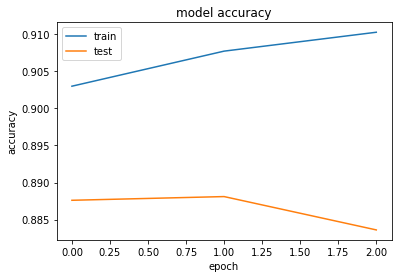

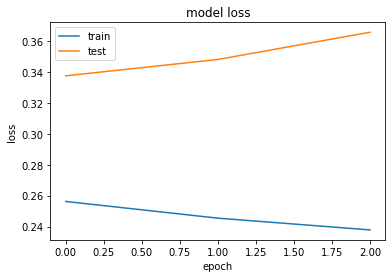

In [130]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()